In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install scipy
!pip install pickle-mixin
!pip install seaborn
!pip install Flask


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import xgboost as xgb
import warnings
import pickle


In [3]:
df=pd.read_csv(r"C:/Users/bolli/Downloads/onlinefraud.csv/onlinefraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


                    step      type    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.006635  0.022373      -0.010058       -0.010299   
type            0.006635  1.000000  0.088419      -0.339760       -0.352758   
amount          0.022373  0.088419  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.339760 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.352758 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665 -0.104679  0.294137       0.066243        0.067812   
newbalanceDest  0.025888 -0.059364  0.459304       0.042029        0.041837   
isFraud         0.031578  0.020833  0.076688       0.010154       -0.008148   

                oldbalanceDest  newbalanceDest   isFraud  
step                  0.027665        0.025888  0.031578  
type                 -0.104679       -0.059364  0.020833  
amount                0.294137        0.459304  0.076688  
oldbalanceOrg         0.066243        0.042029  0.01

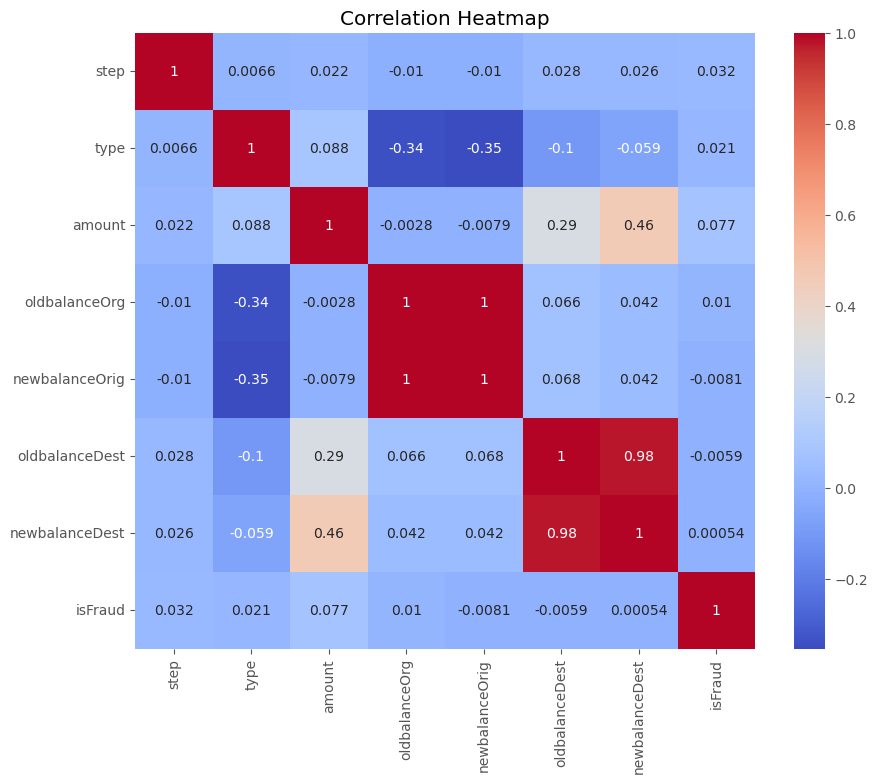

In [4]:
df.columns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

# Set style and filter warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

# Encode the 'type' column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Drop 'isFlaggedFraud' if it exists
if 'isFlaggedFraud' in df.columns:
    df.drop(['isFlaggedFraud'], axis=1, inplace=True)

# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Show correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [6]:
file_path = r"C:/Users/bolli/Downloads/onlinefraud.csv/onlinefraud.csv"
# Read only the first 10 lakh rows
df = pd.read_csv(file_path, nrows=1500000)
print("Shape of the data:", df.shape)

Shape of the data: (1500000, 11)


<Axes: xlabel='step', ylabel='Count'>

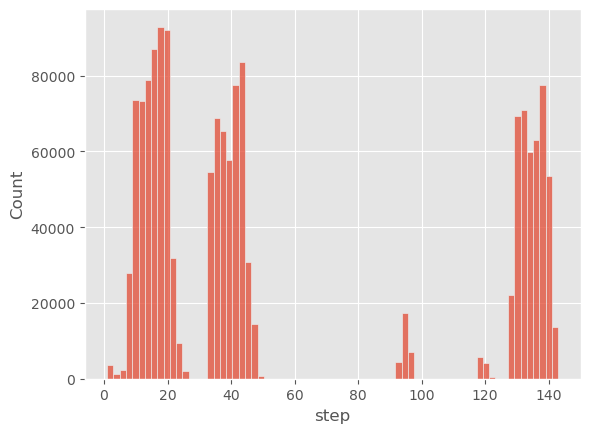

In [7]:
sns.histplot(data =df,x ='step')

<Axes: xlabel='step'>

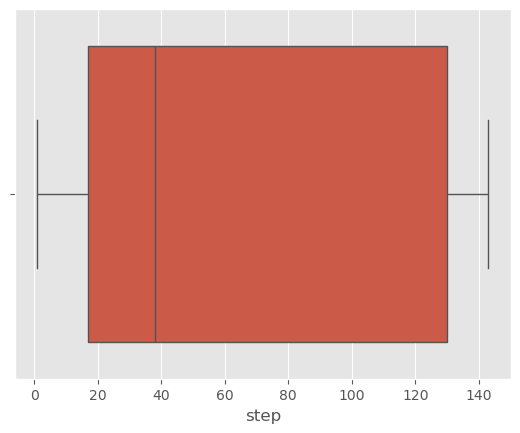

In [8]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

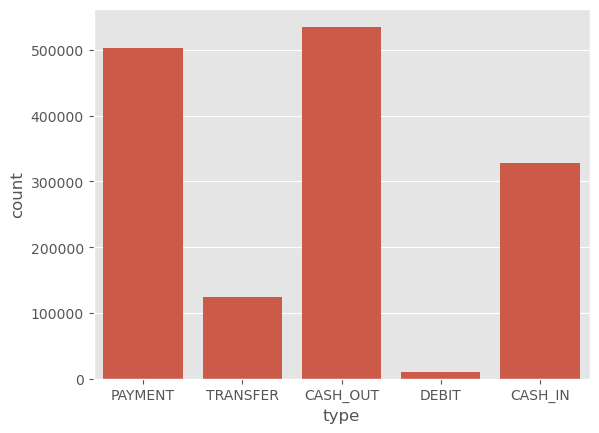

In [9]:
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

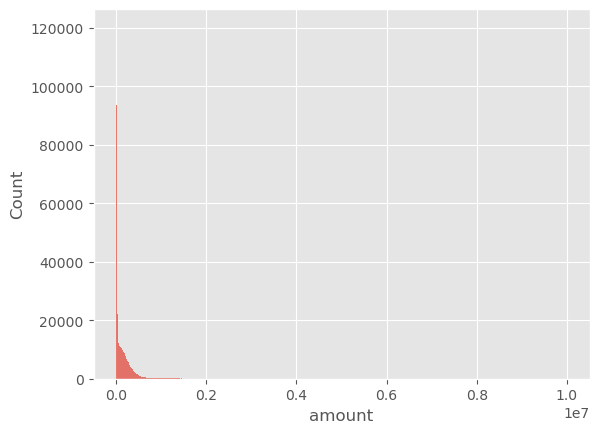

In [10]:
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

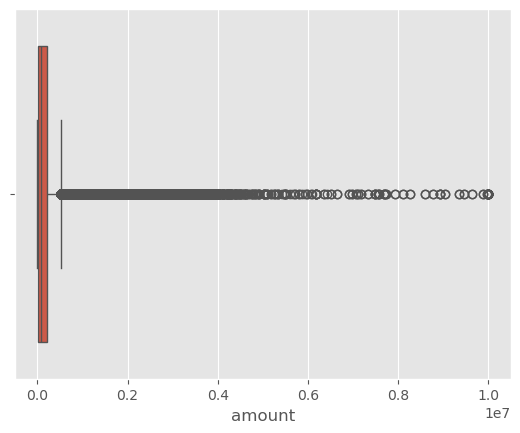

In [11]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

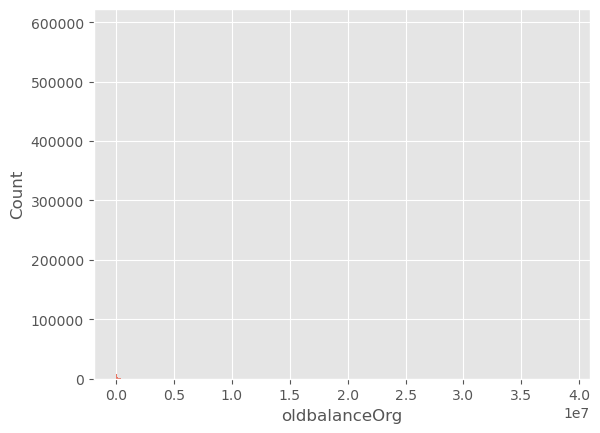

In [12]:
sns.histplot(data=df,x='oldbalanceOrg')

In [13]:
df['nameDest'].value_counts()

nameDest
C985934102     98
C1286084959    97
C248609774     92
C665576141     90
C1590550415    89
               ..
M528199719      1
M49860464       1
M1796425057     1
M483636779      1
M265276048      1
Name: count, Length: 639406, dtype: int64

<Axes: xlabel='oldbalanceOrg'>

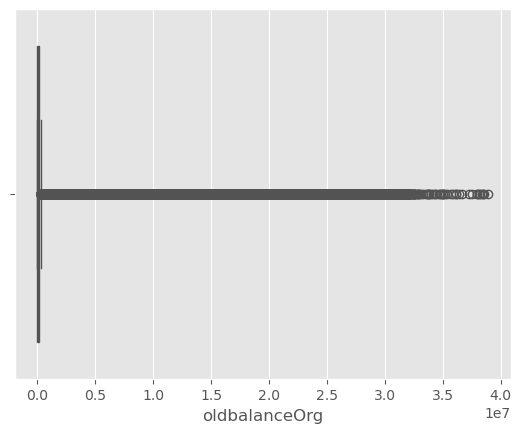

In [14]:
sns.boxplot(data=df,x='oldbalanceOrg')

<Axes: xlabel='newbalanceDest'>

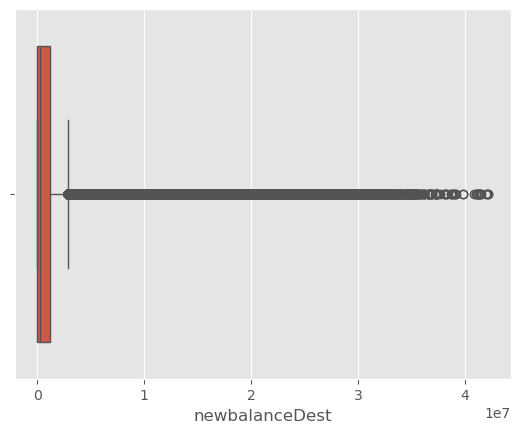

In [15]:
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

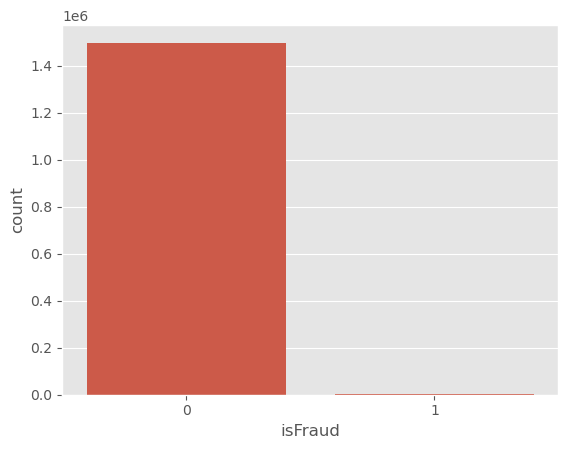

In [16]:
sns.countplot(data=df,x='isFraud')

In [17]:
df['isFraud'].value_counts()

isFraud
0    1498392
1       1608
Name: count, dtype: int64

In [18]:
df.loc[df['isFraud'] == 0, 'isFraud'] = 'is not Fraud'
df.loc[df['isFraud'] == 1, 'isFraud'] = 'is Fraud'
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not Fraud,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not Fraud,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,is Fraud,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,is Fraud,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
1499995,143,PAYMENT,19785.10,C12747265,3158.73,0.00,M2030033438,0.00,0.00,is not Fraud,0
1499996,143,CASH_OUT,365830.64,C931603141,595.00,0.00,C382389804,0.00,365830.64,is not Fraud,0
1499997,143,PAYMENT,11252.75,C331288130,0.00,0.00,M133776574,0.00,0.00,is not Fraud,0
1499998,143,PAYMENT,8493.33,C22036853,0.00,0.00,M265276048,0.00,0.00,is not Fraud,0


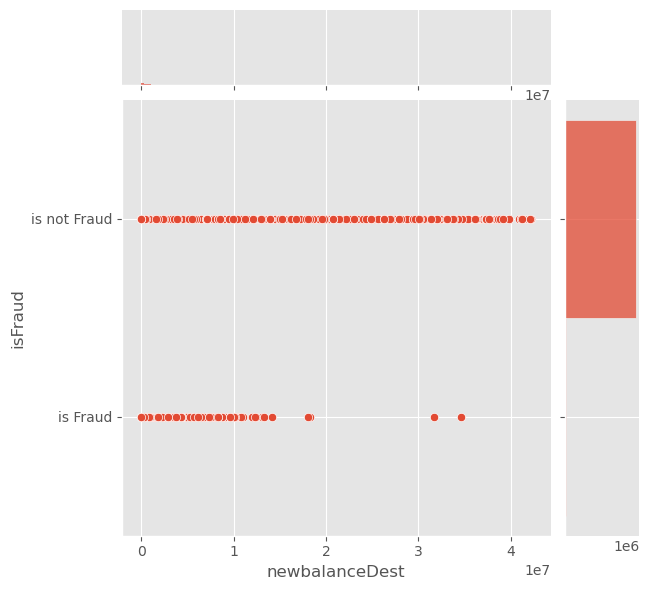

In [19]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

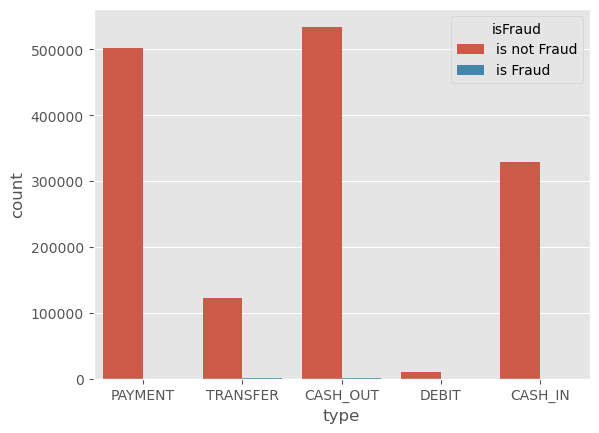

In [20]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

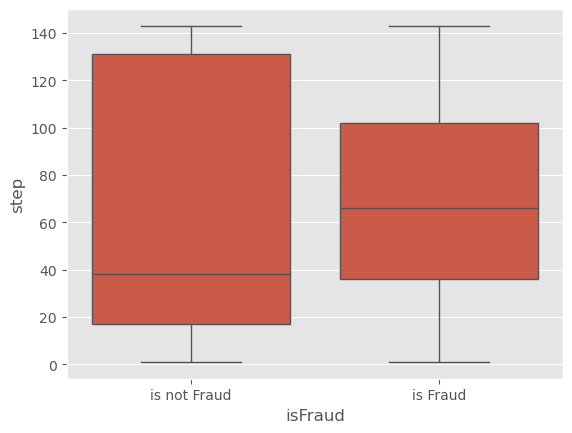

In [21]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

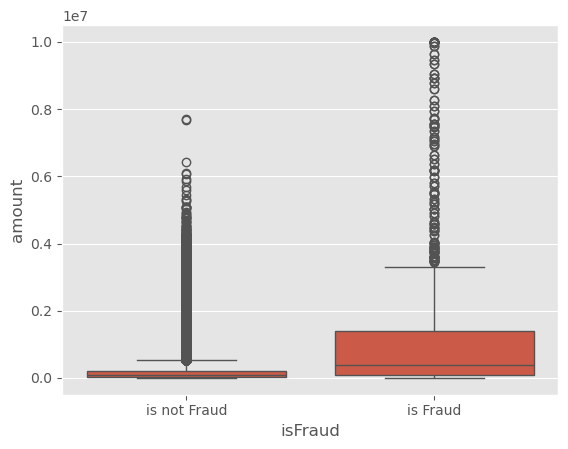

In [22]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

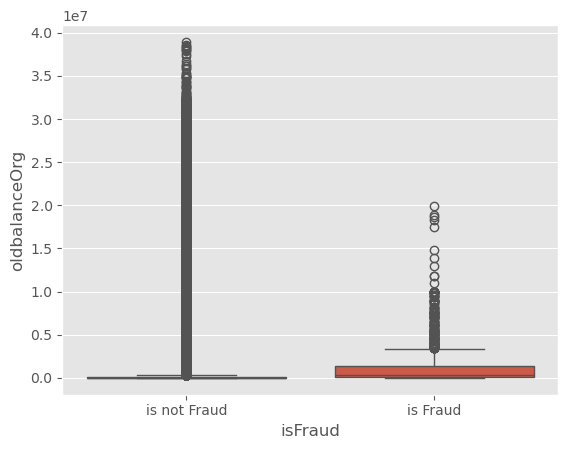

In [23]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

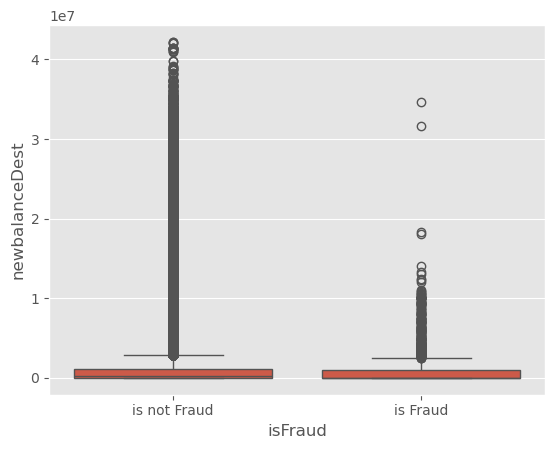

In [24]:
sns.boxplot(data=df,x='isFraud',y='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

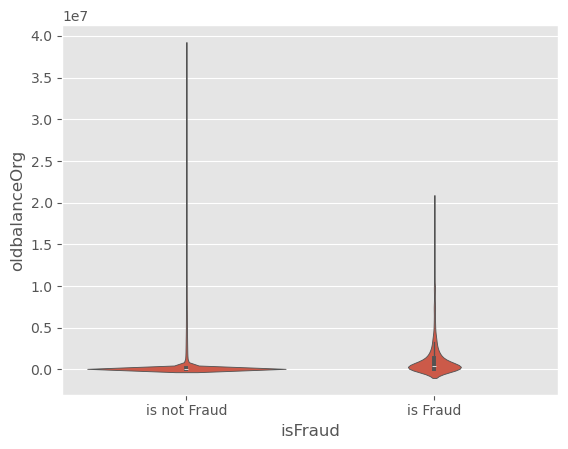

In [25]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

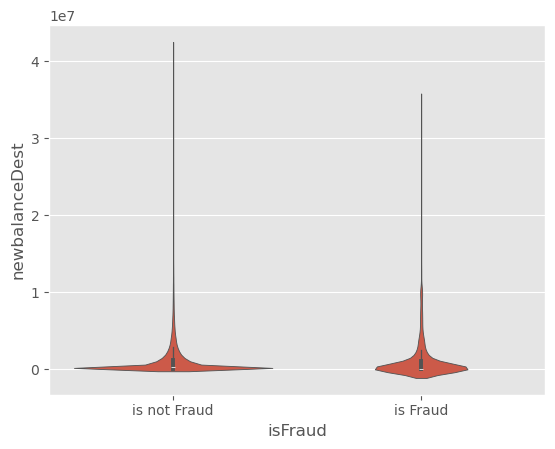

In [26]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

In [27]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.500000e+06,1500000,1.500000e+06,1500000,1.500000e+06,1.500000e+06,1500000,1.500000e+06,1.500000e+06,1500000,1500000.0
unique,NaN,5,NaN,1499469,NaN,NaN,639406,NaN,NaN,2,NaN
top,NaN,CASH_OUT,NaN,C1999539787,NaN,NaN,C985934102,NaN,NaN,is not Fraud,NaN
freq,NaN,535211,NaN,3,NaN,NaN,98,NaN,NaN,1498392,NaN
mean,5.915070e+01,NaN,1.608296e+05,NaN,8.674607e+05,8.882571e+05,NaN,9.893854e+05,1.114852e+06,NaN,0.0
std,5.092537e+01,NaN,2.676604e+05,NaN,2.951755e+06,2.988126e+06,NaN,2.301935e+06,2.406376e+06,NaN,0.0
min,1.000000e+00,NaN,1.000000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.0
25%,1.700000e+01,NaN,1.298844e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.0
50%,3.800000e+01,NaN,7.802889e+04,NaN,1.528600e+04,0.000000e+00,NaN,1.336265e+05,2.244404e+05,NaN,0.0
75%,1.300000e+02,NaN,2.162310e+05,NaN,1.257779e+05,1.670238e+05,NaN,9.364515e+05,1.152679e+06,NaN,0.0


In [28]:
df.isnull().sum()    

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1500000 non-null  int64  
 1   type            1500000 non-null  object 
 2   amount          1500000 non-null  float64
 3   nameOrig        1500000 non-null  object 
 4   oldbalanceOrg   1500000 non-null  float64
 5   newbalanceOrig  1500000 non-null  float64
 6   nameDest        1500000 non-null  object 
 7   oldbalanceDest  1500000 non-null  float64
 8   newbalanceDest  1500000 non-null  float64
 9   isFraud         1500000 non-null  object 
 10  isFlaggedFraud  1500000 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 125.9+ MB


<Axes: ylabel='amount'>

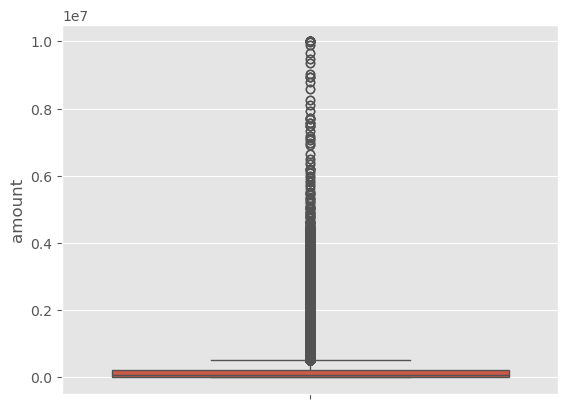

In [30]:
sns.boxplot(df['amount'])

In [31]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check mode and mean
print(stats.mode(df['amount'], keepdims=True))
print(np.mean(df['amount']))

# Calculate IQR
q1 = np.quantile(df['amount'], 0.25)
q3 = np.quantile(df['amount'], 0.75)
IQR = q3 - q1

# Calculate bounds
upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

# Display stats
print("q1:", q1)
print("q3:", q3)
print("IQR:", IQR)
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

print("Skewed data (above upper bound):", len(df[df['amount'] > upper_bound]))
print("Skewed data (below lower bound):", len(df[df['amount'] < lower_bound]))


ModeResult(mode=array([10000000.]), count=array([22], dtype=int64))
160829.64070293333
q1: 12988.4375
q3: 216230.9525
IQR: 203242.515
Upper Bound: 521094.72500000003
Lower Bound: -291875.335
Skewed data (above upper bound): 75896
Skewed data (below lower bound): 0


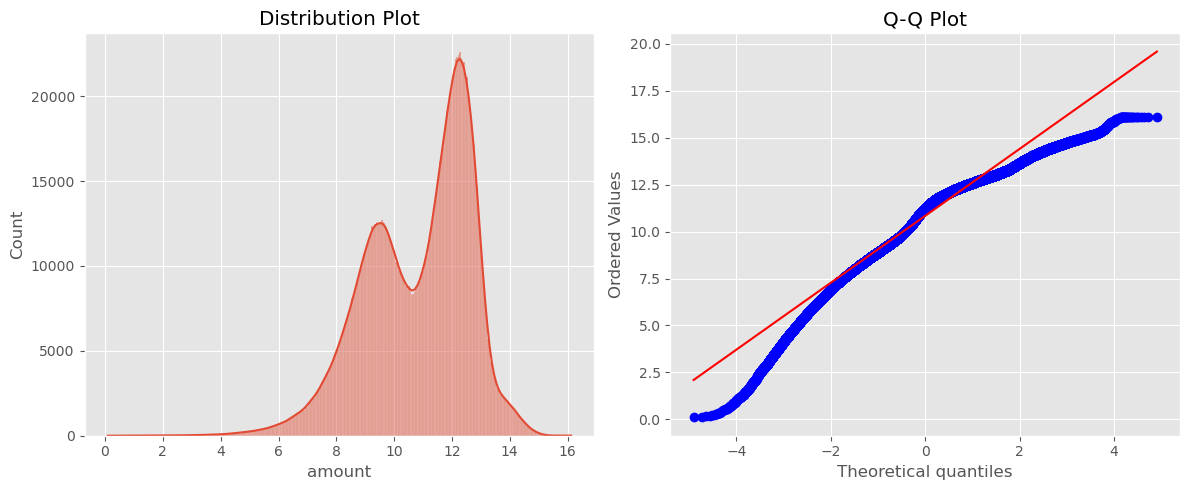

In [32]:
# Define a function to visualize distribution and normality
def transformationPlot(feature):
    plt.figure(figsize=(12, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(feature, kde=True)
    plt.title('Distribution Plot')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(feature, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

# Apply transformation and visualize
transformationPlot(np.log(df['amount'] + 1))  # +1 to avoid log(0) errors

# Replace original amount column with log-transformed version
df['amount'] = np.log(df['amount'] + 1)

In [33]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the 'type' column using LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Optional: Check the encoded values
print(df['type'].value_counts())

# Step 2: Split data into independent (X) and dependent (y) variables
X = df.drop('isFraud', axis=1)   # Independent features
y = df['isFraud']                # Target variable


type
1    535211
3    502308
0    328503
4    123993
2      9985
Name: count, dtype: int64


In [34]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9.194276,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,3,7.531166,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,4,5.204007,C1305486145,181.00,0.00,C553264065,0.00,0.00,0
3,1,1,5.204007,C840083671,181.00,0.00,C38997010,21182.00,0.00,0
4,1,3,9.364703,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1499995,143,3,9.892735,C12747265,3158.73,0.00,M2030033438,0.00,0.00,0
1499996,143,1,12.809929,C931603141,595.00,0.00,C382389804,0.00,365830.64,0
1499997,143,3,9.328457,C331288130,0.00,0.00,M133776574,0.00,0.00,0
1499998,143,3,9.047154,C22036853,0.00,0.00,M265276048,0.00,0.00,0


In [35]:
y

0          is not Fraud
1          is not Fraud
2              is Fraud
3              is Fraud
4          is not Fraud
               ...     
1499995    is not Fraud
1499996    is not Fraud
1499997    is not Fraud
1499998    is not Fraud
1499999    is not Fraud
Name: isFraud, Length: 1500000, dtype: object

In [36]:
# Drop columns only if they exist
df = df.drop(columns=[col for col in ['nameOrig', 'nameDest'] if col in df.columns])

# Encode 'type' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Split into features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show dataset shapes
print("Training set shape (X):", X_train.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (X):", X_test.shape)
print("Testing set shape (y):", y_test.shape)


Training set shape (X): (1200000, 8)
Training set shape (y): (1200000,)
Testing set shape (X): (300000, 8)
Testing set shape (y): (300000,)


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Make predictions
y_test_pred1 = rf_model.predict(X_test)
y_train_pred1 = rf_model.predict(X_train)

# Step 4: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred1))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred1))

print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred1))
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred1))


Confusion Matrix:
[[299676      6]
 [    72    246]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299682
           1       0.98      0.77      0.86       318

    accuracy                           1.00    300000
   macro avg       0.99      0.89      0.93    300000
weighted avg       1.00      1.00      1.00    300000

Test Accuracy Score: 0.99974
Train Accuracy Score: 1.0


In [60]:
pd.crosstab(y_test,y_test_pred1)

col_0,0,1
isFraud,,
0,299676,6
1,72,246


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = DecisionTreeClassifier(max_depth=12, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)

y_test_pred2 = model.predict(X_test)
y_train_pred2 = model.predict(X_train)

print(confusion_matrix(y_test, y_test_pred2))
print(classification_report(y_test, y_test_pred2))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred2))
print("Train Accuracy:", accuracy_score(y_train, y_train_pred2))


[[299667     15]
 [   106    212]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299682
           1       0.93      0.67      0.78       318

    accuracy                           1.00    300000
   macro avg       0.97      0.83      0.89    300000
weighted avg       1.00      1.00      1.00    300000

Test Accuracy: 0.9995966666666667
Train Accuracy: 0.9996866666666666


In [62]:
pd.crosstab(y_test,y_test_pred2)

col_0,0,1
isFraud,,
0,299667,15
1,106,212


In [64]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Step 1: Train Extra Trees Classifier
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

# Step 2: Predict
y_test_pred_et = et_model.predict(X_test)
y_train_pred_et = et_model.predict(X_train)

# Step 3: Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_et)
print(f"✅ Extra Trees - test_Accuracy: {test_accuracy:.4f}")
train_accuracy = accuracy_score(y_train, y_train_pred_et)
print(f"✅ Extra Trees - train_Accuracy: {train_accuracy:.4f}")

# Step 4: Classification Report
print("\n📄 Extra Trees - Classification Report:")
print(classification_report(y_test, y_test_pred_et))

# Step 5: Confusion Matrix as Crosstab
print("\n📊 Extra Trees - Confusion Matrix:")
ct_et = pd.crosstab(y_test, y_test_pred_et, rownames=['Actual'], colnames=['Predicted'])
print(ct_et)


✅ Extra Trees - test_Accuracy: 0.9997
✅ Extra Trees - train_Accuracy: 1.0000

📄 Extra Trees - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299682
           1       0.99      0.75      0.85       318

    accuracy                           1.00    300000
   macro avg       0.99      0.88      0.93    300000
weighted avg       1.00      1.00      1.00    300000


📊 Extra Trees - Confusion Matrix:
Predicted       0    1
Actual                
0          299679    3
1              79  239


In [65]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Step 1: Train SVM (with RBF kernel by default)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Step 2: Predict
y_test_pred_svm = svm_model.predict(X_test)
y_train_pred_svm = svm_model.predict(X_train)

# Step 3: Accuracy
accuracy1 = accuracy_score(y_test, y_test_pred_svm)
print(f"✅ SVM - test_Accuracy: {accuracy1:.4f}")
accuracy2 = accuracy_score(y_train, y_train_pred_svm)
print(f"✅ SVM - train_Accuracy: {accuracy2:.4f}")

# Step 4: Classification Report
print("\n📄 SVM - Classification Report:")
print(classification_report(y_test, y_test_pred_svm))

# Step 5: Confusion Matrix (Crosstab)
print("\n📊 SVM - Confusion Matrix:")
ct_svm = pd.crosstab(y_test, y_test_pred_svm, rownames=['Actual'], colnames=['Predicted'])
print(ct_svm)


✅ SVM - test_Accuracy: 0.9992
✅ SVM - train_Accuracy: 0.9992

📄 SVM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299682
           1       0.98      0.25      0.40       318

    accuracy                           1.00    300000
   macro avg       0.99      0.62      0.70    300000
weighted avg       1.00      1.00      1.00    300000


📊 SVM - Confusion Matrix:
Predicted       0   1
Actual               
0          299680   2
1             239  79


In [66]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Step 1: Create and train the LinearSVC model
svm_model = LinearSVC(max_iter=10000, random_state=42)
svm_model.fit(X_train, y_train)

# Step 2: Predict
y_test_pred_svm = svm_model.predict(X_test)
y_train_pred_svm = svm_model.predict(X_train)

# Step 3: Accuracy
accuracy1 = accuracy_score(y_test, y_test_pred_svm)
print(f"✅ LinearSVC - Test_Accuracy: {accuracy1:.4f}")

accuracy2 = accuracy_score(y_train, y_train_pred_svm)
print(f"✅ LinearSVC - Train_Accuracy: {accuracy2:.4f}")

# Step 4: Classification Report
print("\n📄 LinearSVC - Classification Report:")
print(classification_report(y_test, y_test_pred_svm))

# Step 5: Confusion Matrix (as Crosstab)
print("\n📊 LinearSVC - Confusion Matrix:")
ct_svm = pd.crosstab(y_test, y_test_pred_svm, rownames=['Actual'], colnames=['Predicted'])
print(ct_svm)


✅ LinearSVC - Test_Accuracy: 0.9991
✅ LinearSVC - Train_Accuracy: 0.9991

📄 LinearSVC - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299682
           1       0.64      0.29      0.40       318

    accuracy                           1.00    300000
   macro avg       0.82      0.65      0.70    300000
weighted avg       1.00      1.00      1.00    300000


📊 LinearSVC - Confusion Matrix:
Predicted       0   1
Actual               
0          299629  53
1             225  93


In [67]:
# Convert target column to numeric
y_train = y_train.replace({'is Fraud': 1, 'is not Fraud': 0})
y_test = y_test.replace({'is Fraud': 1, 'is not Fraud': 0})

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Step 1: Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Predict
y_test_pred_xgb = xgb_model.predict(X_test)
y_train_pred_xgb = xgb_model.predict(X_train)

# Step 3: Accuracy
accuracy1 = accuracy_score(y_test, y_test_pred_xgb)
print(f"✅ XGBoost - Test_Accuracy: {accuracy1:.4f}")

accuracy2 = accuracy_score(y_train, y_train_pred_xgb)
print(f"✅ XGBoost - Train_Accuracy: {accuracy2:.4f}")

# Step 4: Classification Report
print("\n📄 XGBoost - Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))

# Step 5: Confusion Matrix (Crosstab)
print("\n📊 XGBoost - Confusion Matrix:")
ct_xgb = pd.crosstab(y_test, y_test_pred_xgb, rownames=['Actual'], colnames=['Predicted'])
print(ct_xgb)


✅ XGBoost - Test_Accuracy: 0.9984
✅ XGBoost - Train_Accuracy: 0.9985

📄 XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299682
           1       0.30      0.37      0.33       318

    accuracy                           1.00    300000
   macro avg       0.65      0.69      0.66    300000
weighted avg       1.00      1.00      1.00    300000


📊 XGBoost - Confusion Matrix:
Predicted       0    1
Actual                
0          299404  278
1             200  118


In [71]:
def compareModel():
    print("train accuracy for rfc", accuracy_score(y_train_pred1, y_train))
    print("test accuracy for rfc", accuracy_score(y_test_pred1, y_test))
    
    print("train accuracy for dtc", accuracy_score(y_train_pred2, y_train))
    print("test accuracy for dtc", accuracy_score(y_test_pred2, y_test))
    
    print("train accuracy for etc", accuracy_score(y_train_pred_et, y_train))
    print("test accuracy for etc", accuracy_score(y_test_pred_et, y_test))
    
    print("train accuracy for svc", accuracy_score(y_train_pred_svm, y_train))
    print("test accuracy for svc", accuracy_score(y_test_pred_svm, y_test))
    
    print("train accuracy for xgb1", accuracy_score(y_train_pred_xgb, y_train))
    print("test accuracy for xgb1", accuracy_score(y_test_pred_xgb, y_test))


In [72]:
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.99974
train accuracy for dtc 0.9996866666666666
test accuracy for dtc 0.9995966666666667
train accuracy for etc 1.0
test accuracy for etc 0.9997266666666667
train accuracy for svc 0.9991066666666667
test accuracy for svc 0.9990733333333334
train accuracy for xgb1 0.9985108333333333
test accuracy for xgb1 0.9984066666666667


In [ ]:
import pickle

# Save the model to a file
pickle.dump(rf_model, open('payments.pkl', 'wb'))